# Dataset STUDENT PERFORMANCE de Kaggle
Este dataset contiene diferentes características sobre 10.000 estudiantes, todas relacionadas con sus estudios o factores que pueden influir en el rendimiento de los mismos. <br>
[Enlace al dataset en Kaggle.](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

🎯 **Objetivo**: Predecir el rendimiento del estudiante en función de variables como horas de estudio, horas de sueño...

1. Carga y análisis exploratorio de los datos (EDA) del dataset.
2. Prepara los datos.
3. Entrena un modelo de regresión lineal múltiple.
4. Visualiza las relaciónes entre las variables predictoras y la variable a predecir.

📈 **Regresión múltiple**: ¿Cómo influyen diferentes variables como las horas de sueño y estudio, entre otras, al rendimiento de un estudiante?

## Importación de librerías
Primeramente procedemos a importar las librerías de todas las herramientas que utilizaremos en el desarrollo de este modelo.

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Carga y análisis exploratorio de los datos (EDA)
### Información general del dataset
Primeramente debemos cargar los datos y realizar un análisis exploratorio (EDA) sobre los mismos para sacar conclusiones y conocerlos mejor.

In [21]:
# Cargamos el CSV en un DataFrame
df = pd.read_csv("Student_Performance.csv")

# Analisis exploratorio de los datos (EDA)
print(df.info())
print(df.describe())
profile = ProfileReport(df)
# profile.to_file("student_performace.html")
profile

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 5999.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Creamos dos dataframe que contengan las variables numéricas y categóricas
num_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
cat_cols = ['Extracurricular Activities']

Observamos que, exceptuando la variable objetivo (``Perfomace Index``) y la variable categórica ``Extracurricular Activities``, el resto de variables son numéricas.

### Correlaciones entre variables

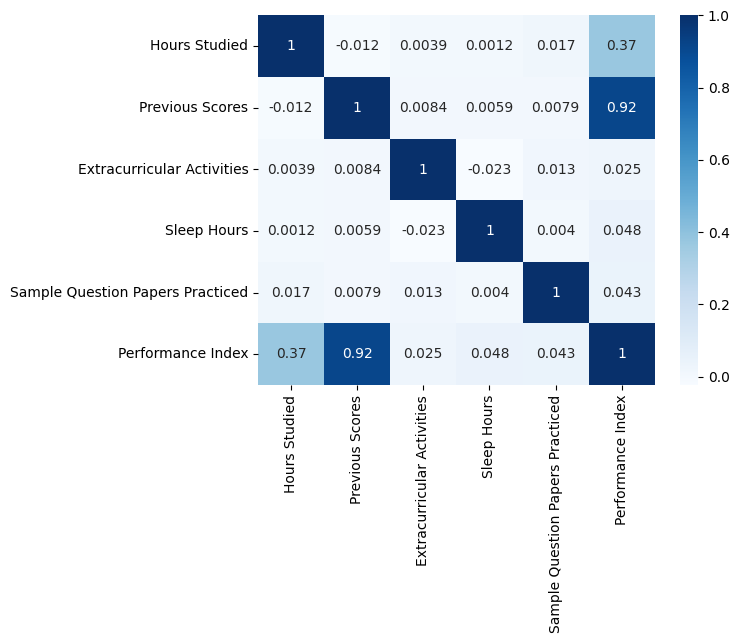

In [23]:
# Encodeamos la variable categórica para poder realizar la matriz de correlación
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

# Crea la matriz de correlación
corr_mtrx = df.corr()

# Muestra la matriz de correlación
sns.heatmap(data=corr_mtrx, annot=True, cmap='Blues')
plt.show()

### Análisis univariable
#### Visualización de valores atípicos (outliers).

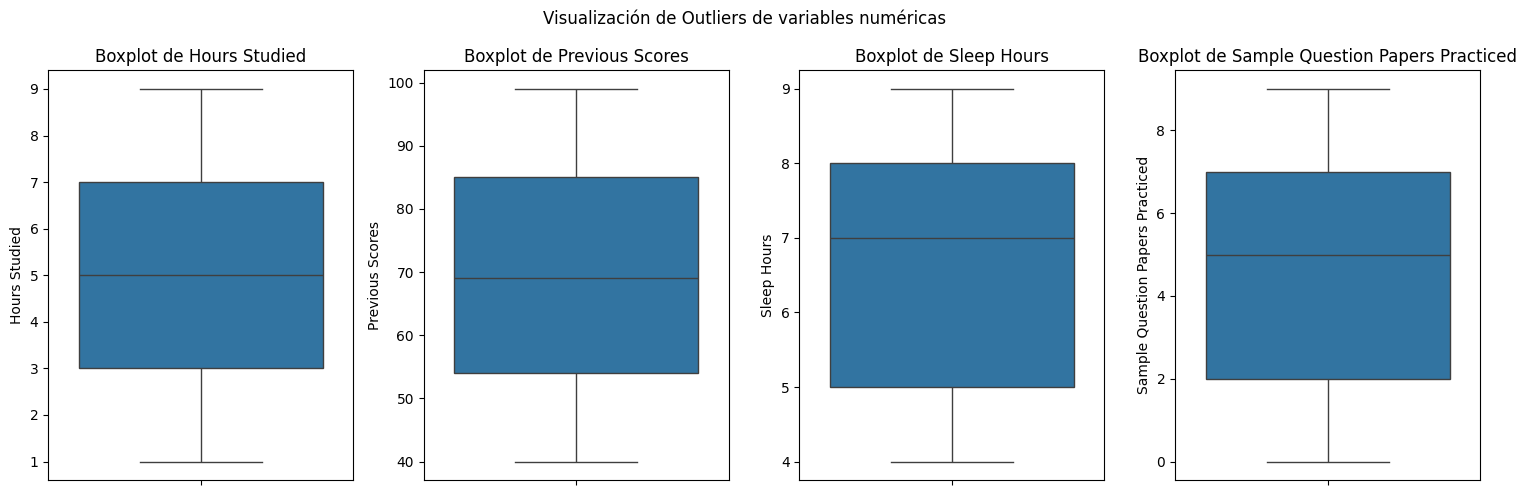

In [24]:
# Visualización de outliers en los datos
# Creación de la figura y sus ejes
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))
# Creación de boxplot por columna y asignación a ejes
for col, ax in zip(num_cols, axes):
    ax.set_title(f"Boxplot de {col}")
    sns.boxplot(data=df, y=col, ax=ax)
# Título de la figura
plt.suptitle("Visualización de Outliers de variables numéricas")
# Evita superposición entre gráficos
plt.tight_layout()
# Muestra los gráficos
plt.show()

#### Visualización de las distribuciones de los datos

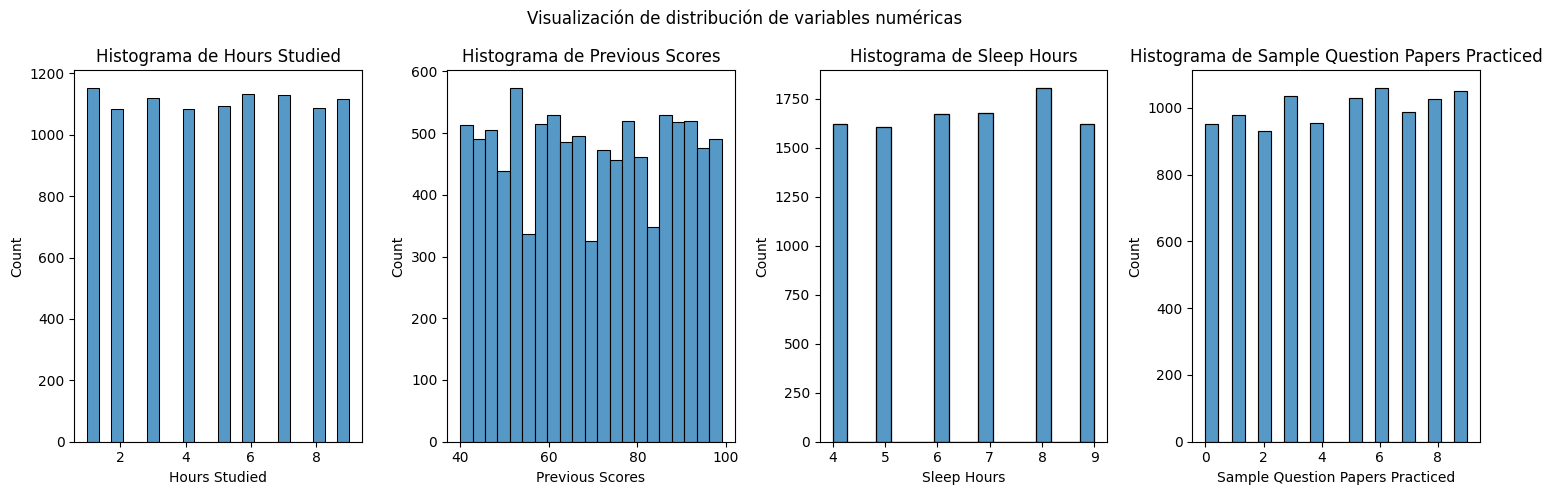

In [25]:
# Visualización de la distribución de los datos numéricos
# Creación de la figura y sus ejes
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))
# Creación de los histogramas por columna y asignación a ejes
for col, ax in zip(num_cols, axes):
    ax.set_title(f"Histograma de {col}")
    sns.histplot(data=df, x=col, ax=ax)
# Título de la figura
plt.suptitle("Visualización de distribución de variables numéricas")
# Evita superposición entre gráficos
plt.tight_layout()
# Muestra los gráficos
plt.show()

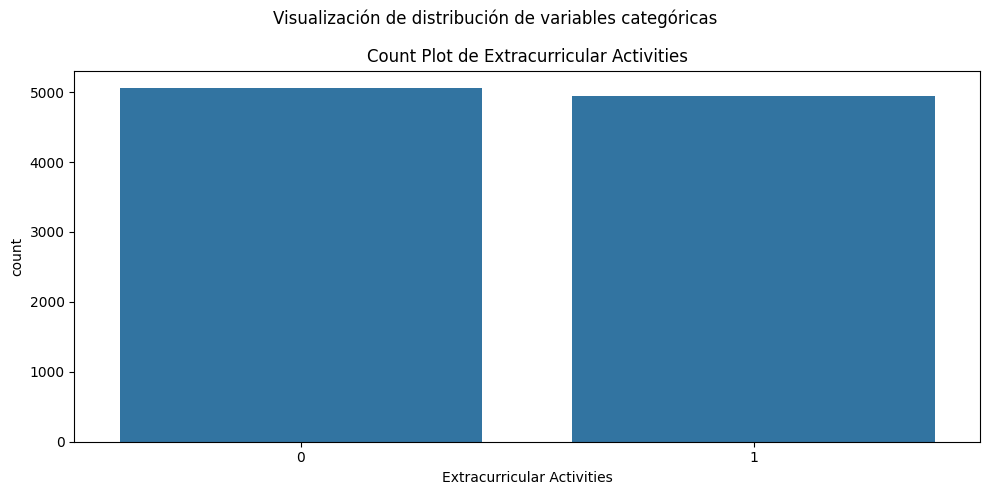

In [26]:
# Visualización de outliers en los datos
# Creación de la figura y sus ejes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
# Creación de boxplot por columna y asignación a ejes
ax.set_title("Count Plot de Extracurricular Activities")
sns.countplot(data=df, x=cat_cols[0], ax=ax)
# Título de la figura
plt.suptitle("Visualización de distribución de variables categóricas")
# Evita superposición entre gráficos
plt.tight_layout()
# Muestra los gráficos
plt.show()

### Análisis bivariable

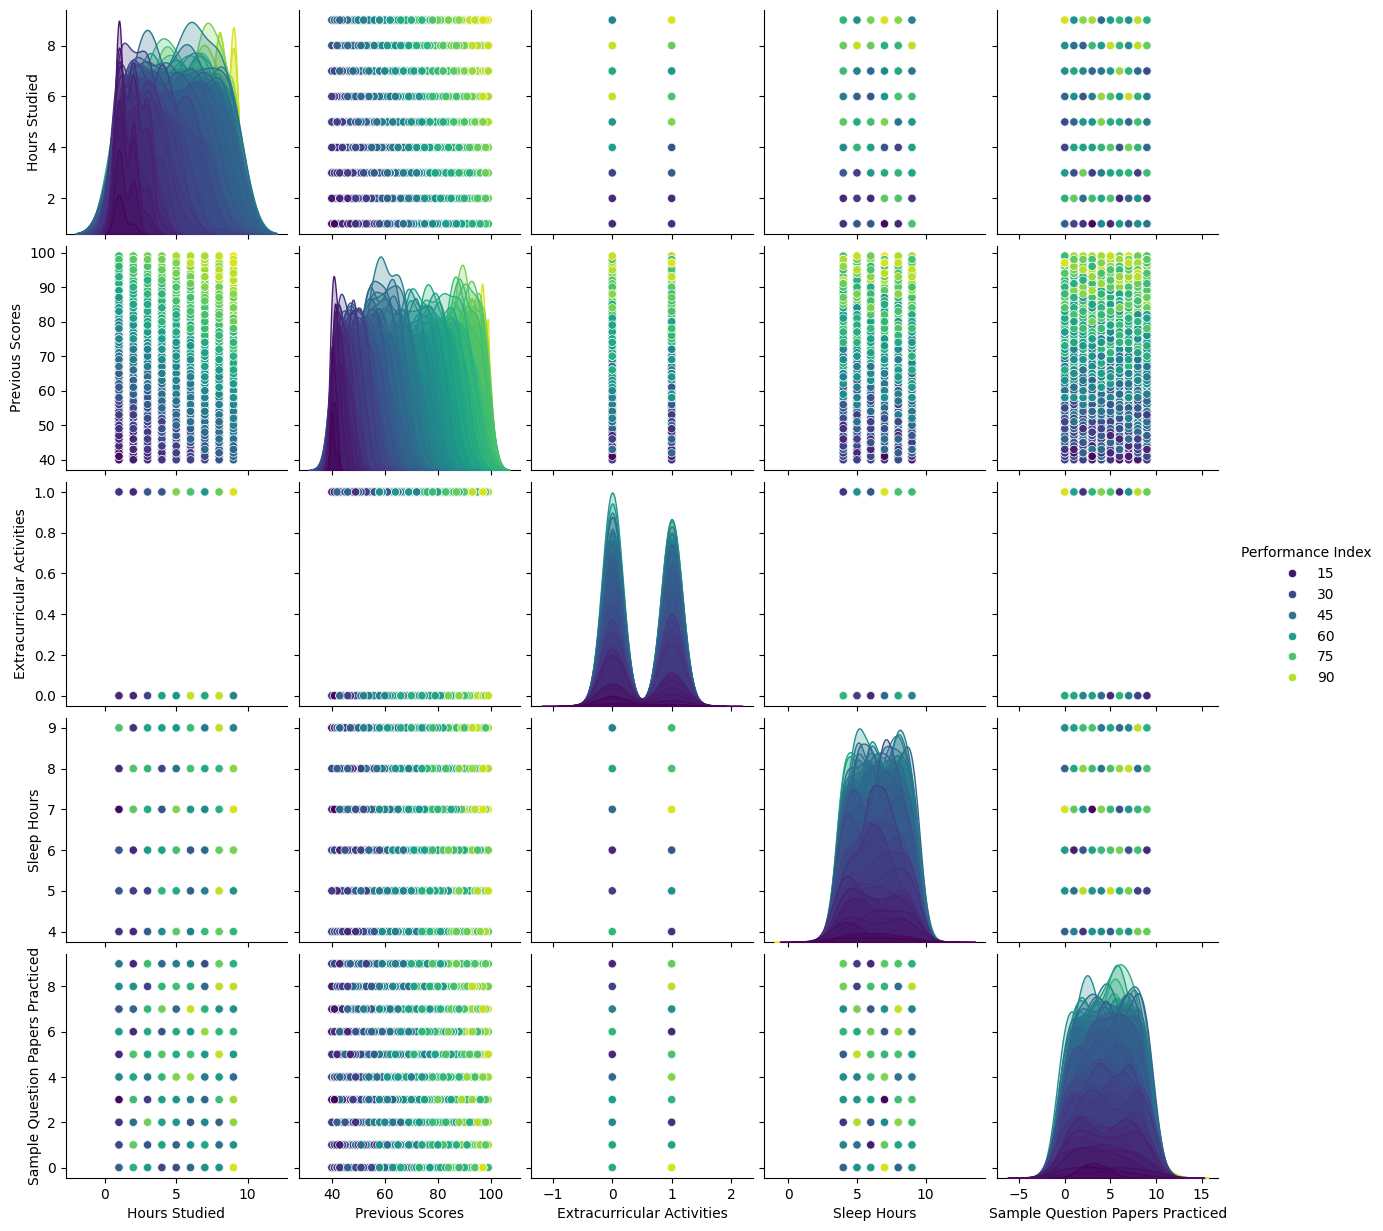

In [27]:
# Análisis bivariable
sns.pairplot(data=df, hue='Performance Index', palette='viridis') 

### Conclusiones del EDA
- Los tipos de las variables son:
    - Numéricas: 4 variables (``Hours Studied``, ``Previous Scores``, ``Sleep Hours``, ``Sample Question Papers Practiced``)
    - Categóricas: 1 variable (``Extracurricular Activities``)
- Los datos **NO** presentan **valores nulos** (NaN).
- Existen **126** (1.3%) de registros **duplicados**.
- Las variables predictoras numéricas **NO** presentan outliers significativos.
- Todas las variables predictoras numéricas muestran una **buena distribución de datos**, obteniedo puntuaciones en el **coeficiente de asimetría** muy cercanas a **0**.
- La única variable categórica muestra una buena distribución de clases.
- La variable predictora (`Previous Scores`) y la variable a predecir (`Performance Index`) presentan una muy alta correlación entre sí (`0.921`).
- En cuanto al **análisis bivariable**:
    - Se observa una correlación entre la variable ``Hours Studied`` y ``Previous Scores`` frente a la variable objetivo. Al aumentar las horas de estudio y la nota anteriormente obtenida por el estudiante hay un aumento de la nota de rendimiento, y viceversa.

## Limpieza de datos
En este caso, la limpieza a realizar es bastante escueta debido a que:

-   Las variables no presentan outliers significativos o no representativos.
-   No hay valores nulos (NaN) 

Lo único que tendriamos que limpiar de nuestros datos serían los registros duplicados, los cuales por el momento vamos a conservar para observar si el eliminarlos afecta al rendimiento de nuestro modelo.

In [28]:
# Eliminación de duplicados
# df = df.drop_duplicates()

## Preprocesamiento y división de los datos
En este caso es necesario aplicar el siguiente preprocesamiento:
- Un escalado a las variables numéricas predictoras ya que se encuentran en diferentes escalas y esto puede perjudicar a nuestro modelo.
- Encodear la variable categórica para que el modelo la entienda. Debido a que esta tiene valores binarios ('Yes','No') bastará realizar un mapeo con los valores 0 y 1.

In [29]:
# Mapeo de la variable categórica
# df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [30]:
# Definimos las variables predictoras y la variable a predecir
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Definimos el escalador 
scaler = StandardScaler()

# Escalamos las variables predictoras
X_scaled = scaler.fit_transform(X)

# División de datos en sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [31]:
# Comprobar que las dimensiones de las variables predictoras una vez escaladas coinciden con la variable a predecir
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas
print('-' * 50)
# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df.corr()["Performance Index"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

"""
· Si una variable tiene baja correlación con MedHouseVal (<0.1) → Puede no ser relevante y podríamos eliminarla.
· Si dos variables tienen correlación alta entre sí (>0.8) → Puede haber colinealidad y deberíamos eliminar una de ellas.
"""

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print('-' * 50)
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print('-' * 50)
print("Intercepto:", modelo.intercept_)
print('-' * 50)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print('-' * 50)
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Tamaño de X_scaled: (10000, 5), Tamaño de y: (10000,)
--------------------------------------------------
Correlaciones con la variable objetivo:
Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64
--------------------------------------------------
VIF de cada variable:
                           Variable       VIF
0                     Hours Studied  1.000478
1                   Previous Scores  1.000326
2        Extracurricular Activities  1.000802
3                       Sleep Hours  1.000600
4  Sample Question Papers Practiced  1.000557
--------------------------------------------------
Intercepto: 55.240756800755946
--------------------------------------------------
Coeficientes:
Hours Studied                        7.385592
Pre

### Análisis de los resultados
- 1. Verificación del tamaño de los datos
    
    ```
    Tamaño de X_scaled: (10000, 5), Tamaño de y: (10000,)
    ```
    
    ✅ **Todo bien**, `X_scaled` y `y` tienen la misma cantidad de filas (**10000 muestras**). Esto confirma que los datos están correctamente alineados.
    
- 2. Análisis de la Correlación con la Variable Objetivo (`Performance Index`)
    
    ```
    Performance Index                   1.000000
    Previous Scores                     0.915189
    Hours Studied                       0.373730
    Sleep Hours                         0.048106
    Sample Question Papers Practiced    0.043268
    Extracurricular Activities          0.024525
    ```
    
    - `Previous Scores` (Última nota del alumno) tiene la correlación más alta con `Performance Index` (+0.91) → Es la variable más importante para predecir la puntuación del rendimiento de un estudiante.
    - `Hours Studied` (Horas diarias de estudio) tiene correlaciones media (+0.37) → Pueden aportar algo de información.
    - `Sleep Hours`, `Sample Question Papers Practiced` y `Extracurricular Activities` tienen correlaciones bajas → Probablemente no contribuyan mucho al modelo.
        
        **💡** Podrían eliminarse estas tres últimas variables para ver como afecta al modelo, en el caso de que el rendimiento sea parecido podriamos ahorrarnos 3 variables obteniendo la misma explicabilidad.
        
- 3. Verificación de la Multicolinealidad con VIF
    
    ```
        VIF de cada variable:
        Variable                            VIF
        Hours Studied                       1.000478
        Previous Scores                     1.000326
        Extracurricular Activities          1.000802
        Sleep Hours                         1.000600
        Sample Question Papers Practiced    1.000557
    ```

    ```
    · VIF < 5 → No hay problema de colinealidad.
    · VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
    · VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.
    ```
    
    No se aprecia colinealidad en ninguna variable.

- 4. Interpretación de los Coeficiente
    
    ```
    Intercepto: 55.240756800755946
    Coeficientes:
    Hours Studied                        7.385592
    Previous Scores                     17.636899
    Extracurricular Activities           0.304292
    Sleep Hours                          0.808787
    Sample Question Papers Practiced     0.550020
    
    ```
    
    - `Previous Scores (17.64)` y `Hours Studied (7.38)`: Los coeficientes más altos y positivos, indica que cuando ela nota anterior y horas del estudio del alumno suben, el rendimiento también sube también sube.
    - `Sleep Hours (0.81)`, `Sample Question Papers Practiced (0.55)` y `Extracurricular Activities (0.30)`: También tiene un impacto positivo, aunque menor.

- 5. Evaluación del Modelo
    
    ```
    MAE (Error Absoluto Medio): 1.6111
    MSE (Error Cuadrático Medio): 4.0826
    RMSE (Raíz del Error Cuadrático Medio): 2.0206
    R² (Coeficiente de Determinación): 0.9890
    ```
    
    - MAE = 1.6111 → En promedio, el modelo se equivoca en 1.61 unidades en la calificación del rendimiento de los estudiantes.
    - MSE = 4.0826 → Penaliza más los errores grandes
    - R² = 0.989 → El modelo solo explica el 98.9% de la variabilidad de la calificación del rendimiento de los estudiantes.

- 6. 🎯 ¿Es un buen modelo?
    - Un R² de 0.989 indica que el modelo es muy preciso, ya que casi el 99% de la variabilidad en las calificaciones para el rendimiento de los estudiantes está explicada por las variables elegidas.
    - Podemos probar a eliminar las variables comentadas en el apartado 2 para ver si obtenemos la misma explicabilidad con menos variables.

### Entrenamiento sin duplicados

In [36]:
# Eliminación de duplicados
df = df.drop_duplicates()

# Definimos las variables predictoras y la variable a predecir
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Definimos el escalador 
scaler = StandardScaler()

# Escalamos las variables predictoras
X_scaled = scaler.fit_transform(X)

# División de datos en sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Comprobar que las dimensiones de las variables predictoras una vez escaladas coinciden con la variable a predecir
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas
print('-' * 50)
# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df.corr()["Performance Index"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

"""
· Si una variable tiene baja correlación con MedHouseVal (<0.1) → Puede no ser relevante y podríamos eliminarla.
· Si dos variables tienen correlación alta entre sí (>0.8) → Puede haber colinealidad y deberíamos eliminar una de ellas.
"""

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print('-' * 50)
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print('-' * 50)
print("Intercepto:", modelo.intercept_)
print('-' * 50)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print('-' * 50)
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Tamaño de X_scaled: (9873, 5), Tamaño de y: (9873,)
--------------------------------------------------
Correlaciones con la variable objetivo:
Performance Index                   1.000000
Previous Scores                     0.915135
Hours Studied                       0.375332
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Extracurricular Activities          0.026075
Name: Performance Index, dtype: float64
--------------------------------------------------
VIF de cada variable:
                           Variable       VIF
0                     Hours Studied  1.000393
1                   Previous Scores  1.000350
2        Extracurricular Activities  1.000888
3                       Sleep Hours  1.000676
4  Sample Question Papers Practiced  1.000540
--------------------------------------------------
Intercepto: 55.204468958980186
--------------------------------------------------
Coeficientes:
Hours Studied                        7.381153
Previ

### Ánalisis de resultados
| Datos            | MAE    | MSE    | RMSE   | R²    |
|:-----------------|:--------|:--------|:--------|:--------|
| Con duplicados    | 1.6111 | 4.0826 | 2.0206 | 0.9890 |
| Sin duplicados    | 1.6470 | 4.3059 | 2.0751 | 0.9884 |

Se observa que al entrenar el modelo sin duplicados obtenemos una bajada practicamente nula en el rendimiento del modelo. <br>
Por esta razón y porque los registros duplicados en este caso son representativos en los datos (varios alumnos pueden tener las mismas características), **se recomienda NO eliminar** estos duplicados.

## Segundo entrenamiento
Procedemos a realizar un segundo entrenamiento eliminando las variable indicadas en el apartado 2 del análisis de resultados anterior.

In [32]:
# Definimos las variables predictoras y la variable a predecir
X = df.drop(columns=['Performance Index', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities'])
y = df['Performance Index']

# Definimos el escalador 
scaler = StandardScaler()

# Escalamos las variables predictoras
X_scaled = scaler.fit_transform(X)

# División de datos en sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# Comprobar que las dimensiones de las variables predictoras una vez escaladas coinciden con la variable a predecir
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas
print('-' * 50)
# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df.corr()["Performance Index"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

"""
· Si una variable tiene baja correlación con MedHouseVal (<0.1) → Puede no ser relevante y podríamos eliminarla.
· Si dos variables tienen correlación alta entre sí (>0.8) → Puede haber colinealidad y deberíamos eliminar una de ellas.
"""

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print('-' * 50)
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print('-' * 50)
print("Intercepto:", modelo.intercept_)
print('-' * 50)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print('-' * 50)
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Tamaño de X_scaled: (10000, 2), Tamaño de y: (10000,)
--------------------------------------------------
Correlaciones con la variable objetivo:
Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64
--------------------------------------------------
VIF de cada variable:
          Variable       VIF
0    Hours Studied  1.000154
1  Previous Scores  1.000154
--------------------------------------------------
Intercepto: 55.25229939874983
--------------------------------------------------
Coeficientes:
Hours Studied       7.400275
Previous Scores    17.643547
dtype: float64
--------------------------------------------------
MAE (Error Absoluto Medio): 1.8269
MSE (Error Cuadrático Medio): 5.2419
RMSE (Raíz del Error Cuadrático Medio): 2.2

### Ánalisis de resultados
| Entrenamiento | MAE  | MSE   | RMSE  | R²    |
|:--------------|:------|:-------|:-------|:--------|
| Con todas las variables | 1.6111 | 4.0826 | 2.0206 | 0.9890 |
| Solo con ``Previous Scores`` y ``Hours Studied`` | 1.8269 | 5.2419 | 2.2895 | 0.9850 |

Podemos apreciar que habiendo eliminado las variables comentadas anteriormente obtenemos una explicabilidad (98.5%) practicamente igual a la obtenida con todas las variables (98.9%). <br>
Por lo que, si en un futuro se recolectaran más muestras sobre estos datos, podriamos obviar estas variables para ahorrar tiempo y gastos ya que prescindir de ellas supone una pérdida mínima.


## Comparación resultados regresión lineal simple y múltiple
| Modelo                     | MAE  |  R²  | RMSE |
|:---------------------------|:--------|:--------|:--------|
| Regresión lineal simple     | 6.56   | 0.841  | 7.68   | 
| Regresión lineal múltiple   | 1.6111 | 0.9890 | 2.0206 |

Observando las métricas, tanto de la regresión lineal simple y de la múltiple, podemos concluir que para este conjunto de datos si se quiere predecir el rendmiento de los mismos lo mejor es tener en cuenta todas las variables y realizar una regresión lineal múltiple.
